# Lab and Workshop on Optimization Problems with Quantum Computers


<b>  Prof Angelakis TUC and team¶ </b>



<b> Background </b>

Optimization problems are found in many industries, from logistics to finance and oil & gas industries. These problems come in various forms, but all of them share the common goal of minimizing or maximizing a certain property. Solving real world optimizations can often result in millions of dollars worth of cost savings or a massive reduction in environmental or resources wastage, and many companies have poured in efforts into finding such solutions. Needless to say, these problems are typically very difficult to solve with classical computers and solution providers usually compete to provide the best heuristics available. One goal of quantum computing is to find solutions to these optimization problems that can outperform modern day classical heuristics. 

Early demonstrations include optimizing traffic done by Volkswagen and also Exxon Mobil as well as portfolio optimization in large banks. In our team we have also been looking extensively in solving current bottlencts in the number of qubits required for such problems with our recent breakthroughs algorithms (see our research page)

In this workshop, we will take a look at how the quantum optimization algorithms we learnt can be applied to the types of optimization problems commonly faced within the industry.  

We will solve two real world problems: the tail assignment problem used to assign aircraft to various routes consisting of different destinations and also the vehicle routing problem.

We will go through the codes hands on, and demonstrate the results using classical emulators but also quantum computers on the cloud. Both are extremely hard, NP hard problems, and classical computers 



<td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td>
    
$ \newcommand{\bb}[1]{\boldsymbol #1} $
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{|#1 \rangle \langle #2|}$
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<img src="v1.png" width="100%" align="center">

# Recap on QUBO and VQAs


<b>Quadratic Unconstrained Binary Optimization (QUBO)</b>

Here, we will focus on a type of binary optimization known as <i>Quadratic Unconstrained Binary Optimization</i> (QUBO) that we have covered in the lectures earlier. As we have learnt, a QUBO problem has a cost function of the form 

$$\begin{aligned}
C & = \boldsymbol{x}^T \cdot \boldsymbol{A} \cdot \boldsymbol{x} \\
& = \sum_{i\neq j} A_{ij} x_i x_j + \sum_i A_{ii} x_i
\end{aligned}
$$

where $\boldsymbol{x}$ is a vector of binary variables, and $\boldsymbol{A}$ is a matrix that is constructed based on the problem you want to solve. A QUBO problem is solved when the optimal vector, $x_{\textrm{opt}}$ consisting of the optimal combination of $1$s and $0$s, is found such that our cost function $C$ is at a minimum. 


<b>Variational Quantum Algorithms (VQAs)</b>



Variational Quantum Algorithms (VQA) (see previous lectures and labs) are a form of <i>hybrid-quantum classical algorithms</i>. These algorithms have a classical component which is executed on a classical computer, and a quantum component which involves a quantum computer. VQAs are typically used to solve problems which requires the quantum computer to output a specific state. A quantum circuit is used to initialize qubits in a trial state, and a classical <i>feedback loop</i> (implemented on a classical computer) is used to tweak the parameters of the quantum circuit such that the circuit outputs the desired quantum state.  

<img src="vqa.png" width="70%" align="center">

<img src="v2.png" width="100%" align="center">

<img src="v3.png" width="100%" align="center">

<img src="v4a.png" width="100%" align="center">

<img src="v6.png" width="100%" align="center">

<img src="v5.png" width="100%" align="center">

<img src="v7.png" width="100%" align="center">

<img src="v8.png" width="100%" align="center">

In [1]:
import numpy as np
import itertools
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
import networkx as nx
import itertools

###### if import fails, uncomment and run the following:
# import sys
# !{sys.executable} -m pip install qiskit_optimization

from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import QuantumInstance



print("Packages imported")


Packages imported


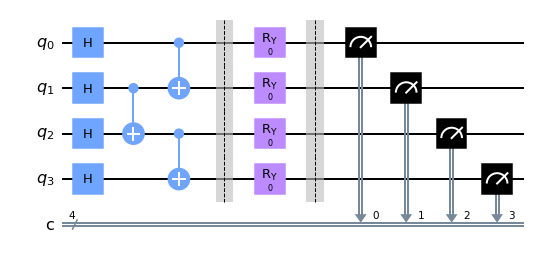

In [2]:


def circuit(nq,nd,angvec): # Creates our variational circuit to use throughout this notebook
    c = QuantumCircuit(nq,nq)
    
    ###############################
    # Functions to create 1 and 2 qubit gates
    def oneqbgates(j):
        for i in range(nq):
            angle = angvec[j+i]
            c.ry(angle,i)
        return c

    def twoqbgates(m): # m is the depth
        if m%2 == 1 and nq%2 == 1:   
            for g in range(2):
                for k in range(0,nq-2,2):
                    c.cx(g+k,g+1+k)
        if m%2 == 1 and nq%2 == 0:  
            for g in range(2):
                for k in range(0,nq-g-1,2):
                    c.cx(k+g,k+g+1)

        if m%2 == 0 and nq%2 == 1:
            for g in range(1,-1,-1):
                for k in range(0,nq-2,2):
                    c.cx(g+k,g+1+k)
                    
        if m%2 == 0 and nq%2 == 0:
            for g in range(1,-1,-1):
                for k in range(0,nq-g-1,2):
                    c.cx(g+k,g+1+k)            
        c.barrier()
        return c  

    def mes():
        for i in range(nq):
            c.measure(i,i)
        return c
    
    ###############################
    # Creating the circuit is just calling the above functions
    
    # Put all qubits in Hadamard
    for i in range(nq):
        c.h(i)
    
    # Generates 3 layers of gates
    j=0
    for i in range(nd):
        twoqbgates(i)
        oneqbgates(j)
        c.barrier()
        
        j = j+nq
       
    # Add measurement at the end
    mes()
    return c

def cdict(circ,measurementcounts): # Function to measure our circuit, used throughout this notebook
    job = execute(circ,Aer.get_backend('qasm_simulator'),shots=measurementcounts,  max_parallel_threads=1)
    return job.result().get_counts(circ)

def cmplot(circ, measurementcounts): # Function to plot the output of our circuit, used throughout this notebook
    job = execute(circ,Aer.get_backend('qasm_simulator'),shots=measurementcounts,  max_parallel_threads=1)
    data = job.result().get_counts(circ)
    fig_len, fig_height = 7,5
    if len(data) > 16:
        fig_len = 20
    return plot_histogram(data, figsize=(fig_len,fig_height))

test_circuit = circuit(4,1,np.zeros(20))

test_circuit.draw(output='mpl')

# Travelling Salesman Problem

<img src="v9.png" width="50%" align="right">

### Introduction

Objective: Find a cycle through all available destinations such that the total distance travelled is at a minimum

### Constraints

 - At each timestep, the salesman has to visit a destination
 - At each timestep, only one destination can be visited


### A Classical Optimization Problem



Consider a set of $N$ destinations. Here, we will require $N^2$ binary variables $x_{i,p}$. $i$ is the index for the locations, and $p$ is the index for each *timestep*. A matrix $w_{ij}$ is used to contain all the distances between the locations $i$ and $j$.

The Travelling Salesman Problem with the constraints above can then be formulated as follows:



$$\begin{aligned}
\min_{x} & \sum_{i,j} w_{ij} \sum_{p} x_{i,p} x_{j,p+1}  \\
\textrm{s.t. } & \sum_{i} x_{i,p}  = 1 \: & \forall p\\
& \sum_{p} x_{i,p} = 1 \: & \forall i\\
& x_{i,p} \in \{0,1\} \: &
\end{aligned}
$$

 - First line: Objective to be minimized. It is the total distance travelled.
 - Second line: constraint. Each destination can only be visited once.
 - Third line: constraint. One destination has to be visited at each timestep.

The binary variables $x_{i,p} = 1$ if destination $i$ is visited at time $p$. If we initialize a problem with $N=4$ destinations, the mapping will result in a $16\times 16$ QUBO problem. This might not seem very big, and can be solved quickly using classical methods. However, as the number of destinations increase, the size of the problem increases very quickly, and the number of possible solutions will soon become too large to enumerate. 




In [3]:
###### if import fails, uncomment and run the following:
# import sys
# !{sys.executable} -m pip install qiskit_optimization

from qiskit_optimization.applications import Tsp
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer


distance
 [[ 0. 78. 14.]
 [78.  0. 88.]
 [14. 88.  0.]]


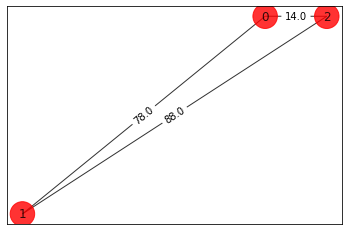

In [5]:
# Generating a graph of 3 nodes    
n = 3
num_qubits = n ** 2
my_tsp = Tsp.create_random_instance(n, seed=100)
adj_matrix = nx.to_numpy_matrix(my_tsp.graph)
print('distance\n', adj_matrix)

# Draw the graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['r' for node in G.nodes()]

for i in range(0, n):
    for j in range(i+1, n):
        G.add_edge(i, j, weight=adj_matrix[i,j])

pos = [my_tsp.graph.nodes[node]['pos']  for node in my_tsp.graph.nodes]

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]['weight'])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, edge_color='b', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, font_color='b', edge_labels=edge_labels)
    
def get_timesteps(bitstring, n_destination):
    timesteps = best_bitstring_tsp.reshape(n_destination ,-1)
    ts1 = timesteps[0]
    print("Original bitstring:", bitstring)
    print("Broken into timesteps:", [list(t) for t in timesteps])
    print(list(ts1), " Start from destination:", np.where(ts1== 1)[0][0])
    for k in range(1,n_destination-1):
        tstep = timesteps[k]
        print(list(tstep), " Move to destination:",np.where(tstep== 1)[0][0])
    tsf = timesteps[-1]
    print(list(tsf), " End at destination:", np.where(tsf== 1)[0][0])
    
draw_graph(G, colors, pos)
plt.pause(0.01)



Total number of possible solutions: 6


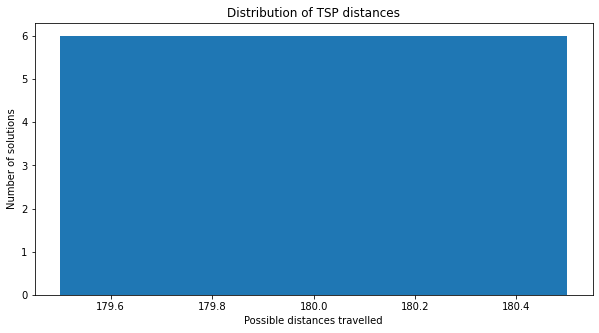

In [7]:
tsol_vals = []

jr1 = 0
for tsol in itertools.permutations(range(n), r=n):
    t_dist = my_tsp.tsp_value(tsol, adj_matrix)
    tsol_vals.append(t_dist)
    jr1 = jr1 + 1

sol_counts = dict()
for i in tsol_vals:
    sol_counts[i] = sol_counts.get(i, 0) + 1

distances = list(sol_counts.keys())
counts = list(sol_counts.values())

print("Total number of possible solutions:",jr1 )

fig = plt.figure(figsize = (10, 5))
plt.bar(distances,counts,width = 1)
plt.xlabel("Possible distances travelled")
plt.ylabel("Number of solutions")
plt.title("Distribution of TSP distances")
plt.show()




### Reformulating TSP as a QUBO

Since we only have equality constraints, we can implement them easily into our cost function to give us a single objective to be minimized. We will use a penalty term, $A$, that increases the cost function value each time the constraints are not met.


$$\begin{aligned}
C(\boldsymbol{x}) =  &\sum_{i,j} w_{ij} \sum_{p} x_{i,p} x_{j,p+1}  \\
& + A \left( \sum_{i} x_{i,p} - 1 \right)^2\\
& + A \left( \sum_{p} x_{i,p} - 1 \right)^2 
\end{aligned}
$$

We choose the value $A$ such that it is bigger than the largest term in our destination matrix.

With our $N=3$ destinations, we can formulate our problem as a $9 \times 9$ QUBO problem.

Qiskit provides some functionality for the travelling salesman problem. These functions allow us to obtain the required QUBO matrices.


In [8]:
def TSP_qubomat(qp): # Function to obtain qubo problem using Qiskit functionality
    
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    wvec = qubo.objective.linear.to_array()         # Obtain the linear terms
    hmat = qubo.objective.quadratic.to_array()      # Obtain the quadratic terms
    return hmat, wvec


qp = my_tsp.to_quadratic_program()


tsp_quad, tsp_linear= TSP_qubomat(qp)

print(tsp_quad)

[[2162. 2162. 2162. 2162.   78.   78. 2162.   14.   14.]
 [   0. 2162. 2162.   78. 2162.   78.   14. 2162.   14.]
 [   0.    0. 2162.   78.   78. 2162.   14.   14. 2162.]
 [   0.    0.    0. 2162. 2162. 2162. 2162.   88.   88.]
 [   0.    0.    0.    0. 2162. 2162.   88. 2162.   88.]
 [   0.    0.    0.    0.    0. 2162.   88.   88. 2162.]
 [   0.    0.    0.    0.    0.    0. 2162. 2162. 2162.]
 [   0.    0.    0.    0.    0.    0.    0. 2162. 2162.]
 [   0.    0.    0.    0.    0.    0.    0.    0. 2162.]]


### Solving the problem classically using "brute force"

Here, we will look for the optimal solutions by brute forcing our way through all $2^9=512$ solutions and looking for the bitstring that gives us the lowest cost function value

Best bitstring found: [0 0 1 0 1 0 1 0 0]
Total distance = 180.0

Original bitstring: [0 0 1 0 1 0 1 0 0]
Broken into timesteps: [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
[0, 0, 1]  Start from destination: 2
[0, 1, 0]  Move to destination: 1
[1, 0, 0]  End at destination: 0


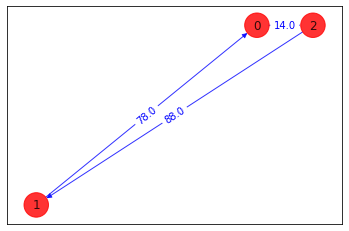

In [9]:

def solve_tsp(quad_term, linear_term):
    
    bcf = 9e9
    for item in itertools.product([0,1],repeat=len(quad_term)):
        bitstring = np.array(item)
        cf = (bitstring.dot(quad_term)).dot(bitstring) + bitstring.dot(linear_term) 
        
        if cf < bcf:
            bcf = cf
            bestbitstring = bitstring
            
    print("Best bitstring found:", bestbitstring)
    return bestbitstring

best_bitstring_tsp = solve_tsp(tsp_quad, tsp_linear)
best_order = my_tsp.interpret(best_bitstring_tsp)
print('Total distance = ' + str(my_tsp.tsp_value(best_order, adj_matrix)))

draw_tsp_solution(G, best_order, colors, pos)
print()
get_timesteps(best_bitstring_tsp,n)

### Solving the problem using a hardware efficient variational quantum algorithm:

From the earlier sessions, we learned that QUBO problems can be re-casted as an *Ising Hamiltonian*, $H_{i}$ which describes the energy of a quantum system consisting of spins.

To solve our QUBO problem using quantum methods, we use a quantum circuit to generate quantum states for us, and our objective is to find the quantum state $\ket{\psi_{\textrm{opt}}}$ that minimizes the expectation value of Hamiltonian, $\langle H_i\rangle$. This optimal state $\ket{\psi_{\textrm{opt}}}$ will correspond to the best classical solution $\boldsymbol{x}_{\textrm{opt}}$.

As above, Qiskit has provided some functions for us to obtain the Ising Hamiltonian. From here, we use our classical optimizer, COBYLA, to tune our quantum circuit such that $\langle H_i\rangle$ is minimized.



In [10]:
# Uses Qiskit to formulate the problem as a quadratic optimization model
qp = my_tsp.to_quadratic_program()
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

Begin optimization: 9
Circuit depth: 6


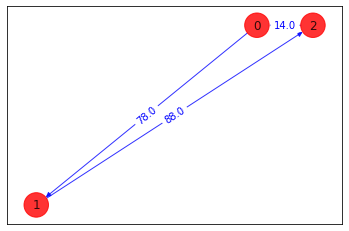

Original bitstring: [0. 1. 0. 0. 0. 1. 1. 0. 0.]
Broken into timesteps: [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
[0, 0, 1]  Start from destination: 2
[0, 1, 0]  Move to destination: 1
[1, 0, 0]  End at destination: 0
energy: -6507.455695072768
time: 18.055756330490112
feasible: True
solution found :  [0. 1. 0. 0. 0. 1. 1. 0. 0.]
solution objective: 180.0


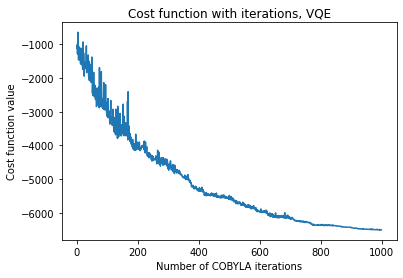

In [17]:


# Uncomment this section to use finite number of shots. Will be slower
# backend = Aer.get_backend('qasm_simulator')
# quantum_instance = QuantumInstance(backend, shots=1000)

backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend)

cdepth = 6
print("Begin optimization:", qubitOp.num_qubits)
print("Circuit depth:", cdepth)

while True:
    tsp_cflist = list([])

    def tsp_callback(v0, v1, v2, v3):  
        global tsp_cflist
        curr_iter = v0
        opt_param = v1
        cf_mean = v2
        cf_std = v3
        tsp_cflist.append(cf_mean)
        return None

    cobyla_ = COBYLA(maxiter=1000)
    spsa = SPSA(maxiter=300)
    tsp_circuit = TwoLocal(qubitOp.num_qubits, 'ry', 'cx', reps=cdepth, entanglement='linear')
    vqe = VQE(tsp_circuit, optimizer=cobyla_, quantum_instance=quantum_instance, callback=tsp_callback)

    try:
        result = vqe.compute_minimum_eigenvalue(qubitOp)

        x = my_tsp.sample_most_likely(result.eigenstate)
        z = my_tsp.interpret(x)
        draw_tsp_solution(my_tsp.graph, z, colors, pos)
        plt.pause(0.01)
        
        get_timesteps(x,3)
        
        print('energy:', result.eigenvalue.real)
        print('time:', result.optimizer_time)
        print('feasible:', qubo.is_feasible(x))
        # Qiskit has reverse ordering so the actual solution is below with lsb the right most bit
        print('solution found : ',x)
        #print('solution:', z, x)
        print('solution objective:', my_tsp.tsp_value(z, adj_matrix))

        plt.plot(tsp_cflist)
        plt.title("Cost function with iterations, VQE")
        plt.ylabel("Cost function value")
        plt.xlabel("Number of COBYLA iterations")
        plt.pause(0.01)


        break
    except (TypeError, KeyError) as e:
        pass
    

if quantum_instance.is_statevector:
    rdict = {''.join(x):np.abs(result.eigenstate[int(''.join(x),2)])**2 
             for x in itertools.product('01',repeat = qubitOp.num_qubits)}
else:
    rdict = result.eigenstate

# Plots the results in a histogram
# plot_histogram(rdict, figsize=(20,5))
